In [27]:
%load_ext autoreload
%autoreload 2

In [1]:
from joogle import *

from bs4 import BeautifulSoup
from bs4.element import NavigableString, Tag

with open('data/reuters/reut2-001.sgm') as f:
    soup = BeautifulSoup(f.read(), "lxml")

/home/jacobgdt/.local/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/jacobgdt/anaconda3/envs/cling/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
!ls data/reuters

all-exchanges-strings.lc.txt	    README.txt	   reut2-007.sgm  reut2-015.sgm
all-orgs-strings.lc.txt		    reut2-000.sgm  reut2-008.sgm  reut2-016.sgm
all-people-strings.lc.txt	    reut2-001.sgm  reut2-009.sgm  reut2-017.sgm
all-places-strings.lc.txt	    reut2-002.sgm  reut2-010.sgm  reut2-018.sgm
all-topics-strings.lc.txt	    reut2-003.sgm  reut2-011.sgm  reut2-019.sgm
cat-descriptions_120396.txt	    reut2-004.sgm  reut2-012.sgm  reut2-020.sgm
feldman-cia-worldfactbook-data.txt  reut2-005.sgm  reut2-013.sgm  reut2-021.sgm
lewis.dtd			    reut2-006.sgm  reut2-014.sgm  test01.json


In [20]:
from tqdm import tqdm_notebook as tqdm

METADATA_FIELDS = ["topics", "places", "people", "orgs", "exchanges", "companies"]

def parse_metadata_field(soup, field):
    return [f.text for f in soup.find(field).findAll("d")]

def parse_doc(soup):
    metadata = {f: parse_metadata_field(soup, f) for f in METADATA_FIELDS}
    metadata['date'] = soup.find("date").text
    
    title = soup.find("title")
    if title:
        title = title.text
    
    text = ""
    for c in soup.find("text").children:
        if isinstance(c, NavigableString) and c != "\n":
            text += c
    
    return title, text, (*metadata.values())

def combine_docs():
    from glob import glob
    
    docs = []
    for fp in tqdm(glob('data/reuters/*.sgm')):
        print(fp)
        with open(fp, encoding='latin-1') as f:
            soup = BeautifulSoup(f.read(), "lxml")
            docs.extend(map(parse_doc, soup.findAll("reuters")))
    cols=["title", "body", *METADATA_FIELDS, "date"]
    return pd.DataFrame(docs, columns=cols)

In [21]:
df = combine_docs()
print(df.shape)
df.head()

HBox(children=(IntProgress(value=0, max=22), HTML(value='')))

data/reuters/reut2-006.sgm
data/reuters/reut2-000.sgm
data/reuters/reut2-012.sgm
data/reuters/reut2-005.sgm
data/reuters/reut2-004.sgm
data/reuters/reut2-017.sgm
data/reuters/reut2-021.sgm
data/reuters/reut2-014.sgm
data/reuters/reut2-013.sgm
data/reuters/reut2-015.sgm
data/reuters/reut2-001.sgm
data/reuters/reut2-007.sgm
data/reuters/reut2-016.sgm
data/reuters/reut2-019.sgm
data/reuters/reut2-009.sgm
data/reuters/reut2-003.sgm
data/reuters/reut2-010.sgm
data/reuters/reut2-018.sgm
data/reuters/reut2-020.sgm
data/reuters/reut2-011.sgm
data/reuters/reut2-002.sgm
data/reuters/reut2-008.sgm

(21578, 9)


,title,body,topics,places,people,orgs,exchanges,companies,date
0,VALERO ENERGY <VLO> DEBT UPGRADED BY MOODY'S,Moody's Investors Service Inc said it\nupgrade...,[],[usa],[],[],[],[],17-MAR-1987 10:59:37.95
1,NL <NL> FILES SUITS AGAINST UNITED CATALYSTS,NL Industries Inc's NL\nChemicals Inc subsidia...,[],[usa],[],[],[],[],17-MAR-1987 11:01:59.32
2,IRVING TRUST <V> BUYS GULF/WESTERN <GW> UNIT,Irving Bank Corp said it bought the\nfactoring...,[acq],[usa],[],[],[],[],17-MAR-1987 11:02:40.56
3,DITTLER BROTHERS SEEK LOTTERY INVESTIGATIONS,Dittler Brothers called for\ninvestigations by...,[],[usa],[],[],[],[],17-MAR-1987 11:03:32.29
4,AMRE INC <AMRE> 3RD QTR JAN 31 NET,"Shr five cts vs one ct\n Net 196,986 vs 37,...",[earn],[usa],[],[],[],[],17-MAR-1987 11:07:22.82


In [26]:
df.to_pickle("data/reuters/alldata.pkl")

In [3]:
import pandas as pd

df = pd.DataFrame(list(map(parse_doc, soup.findAll("reuters"))), columns=["title", "body", *METADATA_FIELDS, "date"])
print(df.shape)
df.head()

(1000, 9)


,title,body,topics,places,people,orgs,exchanges,companies,date
0,SANDOZ PLANS WEEDKILLER JOINT VENTURE IN USSR,Sandoz AG said it planned a joint venture\nto ...,[],"[usa, ussr]",[],[],[],[],3-MAR-1987 09:18:21.26
1,TAIWAN REJECTS TEXTILE MAKERS EXCHANGE RATE PLEA,Central bank governor Chang Chi-cheng\nrejecte...,[],"[usa, taiwan]",[],[],[],[],3-MAR-1987 09:19:31.96
2,NATIONAL FSI INC <NFSI> 4TH QTR LOSS,Shr loss six cts vs profit 19 cts\n Net los...,[earn],[usa],[],[],[],[],3-MAR-1987 09:20:23.32
3,OCCIDENTAL <OXY> OFFICIAL RESIGNS,"MidCon Corp, a subsidiary of\nOccidental Petro...",[],[usa],[],[],[],[],3-MAR-1987 09:21:39.11
4,ITALY'S BNL TO ISSUE 120 MLN DLR CONVERTIBLE BOND,Italy's state-owned <Banca Nazionale del\nLavo...,[],[italy],[],[],[],[],3-MAR-1987 09:25:48.88


In [64]:
#df.reset_index().rename(columns={"index": "id"}).to_json(path_or_buf="data/reuters/test01.json")

In [135]:
vsm = VSM(data_path="data/reuters/test01.json", posting_path=None)
vsm.data.head()

,id,title,body,cleaned
0,0,SANDOZ PLANS WEEDKILLER JOINT VENTURE IN USSR,Sandoz AG said it planned a joint venture\nto ...,sandoz said planned joint venture produce herb...
1,1,TAIWAN REJECTS TEXTILE MAKERS EXCHANGE RATE PLEA,Central bank governor Chang Chi-cheng\nrejecte...,central bank governor chang chi cheng rejected...
10,10,MINSTAR INC <MNST> 4TH QTR NET,Oper shr loss 31 cts vs loss 30 cts\n Oper ...,oper shr loss ct loss ct oper net loss loss re...
100,100,HOME FEDERAL OF THE ROCKIES <HROK> 4TH QTR LOSS,Shr loss 2.07 dlrs vs profit 36 cts\n Net l...,shr loss dlrs profit ct net loss profit year s...
101,101,CANADA DECEMBER GDP GAINS 1.2 PCT,"Canada's gross domestic product, by\nindustry,...",canada gross domestic product industry rose se...


In [136]:
vsm.query("year").head()

,title,body,confidence
id,,,
499,None,\nMIDLAND RIGHTS ISSUE STILL EXPECTED SAY ANAL...,0.606584
666,<AMERICAN VENTURES INC> HAS COGENERATION FUNDING,American Ventures Inc said it\nand joint ventu...,0.606584
646,COLOMBIAN INFLATION RISES 2.03 PCT IN FEBRUARY,colombia's cost of living index rose 2.03\npct...,0.606584
647,TALKING POINT/GENERAL MOTORS <GM>,General Motors Corp staged an explosive\nrally...,0.606584
650,ECONOMIC SPOTLIGHT - JAPAN LOW GROWTH MODEL,Healthy growth in corporate profits and in\nco...,0.606584


## Language Model + Query Completion

In [138]:
from itertools import chain

cleaned_bigrams = lambda x: char_ngram(clean(x.replace(".", " EOS"), struct=list, rm_stopwords=False), n=2)
#bigrams = list(chain(*vsm.data.body.apply(clean).apply(make_bigrams).tolist()))
bigrams = list(chain(*vsm.data.body.apply(cleaned_bigrams).tolist()))

len(bigrams)

96367

In [139]:
c = Counter(list(map(tuple, bigrams)))
c.most_common(10)

[(('eos', 'the'), 1022),
 (('eos', 'reuter'), 830),
 (('said', 'eos'), 700),
 (('eos', 'eos'), 501),
 (('the', 'company'), 386),
 (('mln', 'dlrs'), 380),
 (('said', 'the'), 369),
 (('for', 'the'), 257),
 (('eos', 'said'), 213),
 (('mln', 'mln'), 187)]

In [140]:
vocab = set(x[0] for x in bigrams).union((x[1] for x in bigrams))

w2i = dict(map(reversed, enumerate(vocab)))
i2w = dict(map(reversed, w2i.items()))

vocab_size = len(vocab)

In [142]:
mat = np.zeros((vocab_size, vocab_size))
mat.shape

(7710, 7710)

In [143]:
for bigram, count in c.items():
    idx1, idx2 = map(w2i.get, bigram)
    mat[idx1, idx2] = count

In [144]:
bgdf = pd.DataFrame(mat / vocab_size)

def transition_prob(w1, w2):
    return bgdf.loc[w2i[w1], w2i[w2]]

In [145]:
q = ["the", "next", "year"]

In [164]:
def get_next_n(w, bgdf, n=1):
    return list(map(i2w.get, bgdf.loc[w2i[w]].argsort()[::-1][:n]))

In [165]:
get_next_n("year", bgdf, 5)

['eos', 'ago', 'and', 'shr', 'earlier']

In [169]:
def complete_query(seed, bgdf, n=5, cap=5):
    candidates = []
    for c in get_next_n(seed, bgdf, n):
        qstr = ' '.join(q)
        if c == 'eos':
            candidates.append(qstr)
            continue
        qstr += " " + c
        nxt = get_next_n(c, bgdf, 1)[0]
        i = 0
        while(nxt != "eos") and i < cap:
            qstr += " " + nxt
            nxt = get_next_n(nxt, bgdf, 1)[0]
            i += 1
        candidates.append(qstr)
    return candidates

complete_query("year", bgdf)

['the next year',
 'the next year ago',
 'the next year and the company said',
 'the next year shr ct net loss dlrs',
 'the next year earlier']

## KNN + Topic Restriction

In [191]:
train = df[df.topics.apply(bool)]
train.head()

,title,body,topics,places,people,orgs,exchanges,companies,date
2,NATIONAL FSI INC <NFSI> 4TH QTR LOSS,Shr loss six cts vs profit 19 cts\n Net los...,[earn],[usa],[],[],[],[],3-MAR-1987 09:20:23.32
6,<PRECAMBRIAN SHIELD RESOURCES LTD> YEAR LOSS,Shr loss 1.93 dlrs vs profit 16 cts\n Net l...,[earn],[canada],[],[],[],[],3-MAR-1987 09:30:07.60
7,U.K. MONEY MARKET GIVEN FURTHER 437 MLN STG HELP,The Bank of England said it had provided the\n...,"[money-fx, interest]",[uk],[],[],[],[],3-MAR-1987 09:30:48.45
8,GREASE MONKEY HOLDING CORP <GMHC> YEAR NOV 30,"Shr nil vs nil\n Net 130,998 vs 30,732\n ...",[earn],[usa],[],[],[],[],3-MAR-1987 09:32:34.04
9,ACCEPTANCE INSURANCE HOLDINGS INC <ACPT> YEAR,Oper shr profit 1.80 dlrs vs loss 2.28 dlrs\n ...,[earn],[usa],[],[],[],[],3-MAR-1987 09:33:32.98


In [195]:
topics = list(set(chain(*train.topics.apply(tuple).unique())))
topics[:5]

['rice', 'reserves', 'soy-meal', 'ship', 'potato']

In [201]:
t2i = dict(map(reversed, enumerate(topics)))
y = train.topics.apply(lambda x: list(map(t2i.get, x))[0]).tolist()
len(y)

524

In [222]:
test = df[~df.title.isin(train.title)]
test.shape

(473, 9)

In [278]:
"""
Uses matrix multiplication to find `k` most similar documents.
Grabs their labels, flattens (5 docs may have 8 labels or something),
and returns most frequent.
"""

def knn(x, k=5):
    X = vsm.d_w.loc[x]
    nn = []
    for neighbor in vsm.d_w.values.dot(X).argsort()[::-1]:
        if len(nn) == k:
            break
        t = df.topics[neighbor]
        if t:
            nn.append(t)

    labels = list(chain(*nn))
    return Counter(labels).most_common(1)[0][0]

In [281]:
knn(0, k=5)

'coffee'

## K-Means

In [329]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=25).fit(vsm.d_w)
Counter(kmeans.labels_)

Counter({5: 845,
         1: 132,
         0: 1,
         15: 1,
         19: 1,
         8: 1,
         21: 1,
         23: 1,
         20: 1,
         12: 1,
         7: 1,
         14: 1,
         17: 1,
         3: 1,
         4: 1,
         18: 1,
         9: 1,
         2: 1,
         13: 1,
         11: 1,
         22: 1,
         24: 1,
         6: 1,
         16: 1,
         10: 1})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

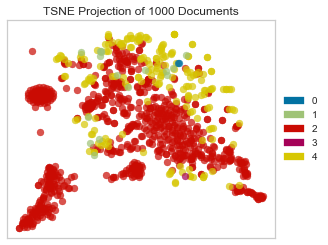

In [323]:
from yellowbrick.text import TSNEVisualizer # https://www.scikit-yb.org/en/latest/api/text/tsne.html
import matplotlib.pyplot as plt

tsne = TSNEVisualizer()
tsne.fit(vsm.d_w, kmeans.labels_)
tsne.poof()
plt.show()

In [305]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df.body)
X_train_counts.shape

(1000, 9592)

In [316]:
kmeans = KMeans(n_clusters=5).fit(X_train_counts)
Counter(kmeans.labels_)

Counter({1: 223, 0: 103, 4: 564, 3: 79, 2: 31})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

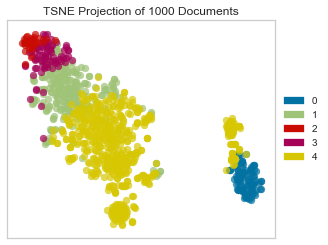

In [321]:
tsne = TSNEVisualizer()
tsne.fit(X_train_counts, kmeans.labels_)
tsne.poof()
plt.show()

In [298]:
import scipy.spatial as sp
1 - sp.distance.cdist(matrix1, matrix2, 'cosine')

## Thesaurus Construction - Word Embeddings

https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html

In [330]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [334]:
cleaned_trigrams = lambda x: char_ngram(clean(x.replace(".", " EOS"), struct=list, rm_stopwords=False), n=3)
#bigrams = list(chain(*vsm.data.body.apply(clean).apply(make_bigrams).tolist()))
trigrams = list(chain(*vsm.data.body.apply(cleaned_trigrams).tolist()))

len(trigrams)

95367

In [335]:
trigrams[0]

['sandoz', 'said', 'planned']

In [340]:
from tqdm import tqdm_notebook as tqdm

CONTEXT_SIZE = 2
EMBEDDING_DIM = 100

losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [341]:
for epoch in range(1):
    total_loss = 0
    for c1, c2, target in tqdm(trigrams):
        context = [c1, c2]

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([w2i[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([w2i[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[686894.960793972]


In [352]:
c1, c2, t = trigrams[0]
i2w[model(torch.tensor([w2i[c1], w2i[c2]])).argmax().item()]

'eos'

In [381]:
def lookup(w):
    return model.embeddings(torch.tensor(w2i[w]))


def nearest_neighbors(w, n=1):
    v = lookup(w)
    mat = torch.matmul(yr, model.embeddings.weight.transpose(0, 1))
    #closest = torch.argsort(mat, descending=True) # upgrade pytorch
    closest = mat.data.numpy().argsort()[::-1]
    
    return list(map(i2w.get, closest[1:n+1]))

nearest_neighbors("year", 5)

['buck', 'asserts', 'party', 'moscow', 'unforgivable']

In [382]:
class Vocab:
    def __init__(self, name=None):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Count SOS, EOS, PAD
        self.ngrams = []
    
    def addList(self, word_list):
        for word in word_list:
            self.addWord(word)
        self.save_ngrams(word_list)
    
    def addSentence(self, sentence):
        self.addList(sentence.split(' '))

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1
            
    def save_ngrams(self, w, n=3):
        grams = [(w[i:i+n-1], w[i+n-1]) for i in range(len(w)-n+1)]
        self.ngrams.extend(grams)
        
        return grams
    
    def sent2tensor(self, sent):
        return torch.tensor([self.word2index[w] for w in sent], dtype=torch.long)
    
    def __len__(self):
        return self.num_words